<a href="https://colab.research.google.com/github/cpvivek/Global-Terrorism-Database-EDA/blob/main/Rossmann_Sales_Prediction_Capstone_Project_Vivek_CP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

I've Carried out two attempts at this problem statement. 

This was a premature attempt at the project. I did not have knowledge of Time Series Analysis at the moment, I started it. With a brief inspection of the data, I decided to approach the problem with Multivariate Regression. 

Later on, when I learnt about time series analysis, I realised it just might be a better 

#Linear Regression, Random Forest Regression Attempt.


##Data Description
Let's start with loading up our datasets and exploring them.

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


We've got two datasets to work with:

Rossman Store data set, which is exclusive to Sales data regarding Rossman Stores.

And Stores Data; a supplemental dataset which takes into consideration the competitions around the stores as well. 

Let's load these two up.

In [5]:
#loading datasets
rossman_data=pd.read_csv('/content/drive/MyDrive/Alma Better Pro/Alma Better Pro Program/Module 4: Machine Learning/Data Sets/Copy of Rossmann Stores Data.csv')
store_data=pd.read_csv('/content/drive/MyDrive/Alma Better Pro/Alma Better Pro Program/Module 4: Machine Learning/Data Sets/Copy of store.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Let's explore the Rossman store data


In [6]:
#Fields we have in hand.
rossman_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [5]:
rossman_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
rossman_data.shape

(1017209, 9)

In [7]:
rossman_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


This dataset doesn't have any null values. Phew. 

In [8]:
#Statistical Summary
rossman_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


Now let's see what the supplemental data holds


In [9]:
store_data.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [10]:
store_data.shape

(1115, 10)

In [11]:
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [12]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


We've got some null values to handle here

In [13]:
#Statistical Summary
store_data.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


##Handeling Null Values

Let's look at a heatmap representing the NaN values in the dataset

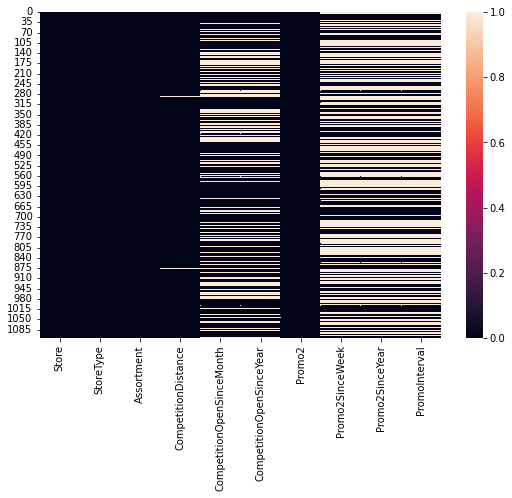

In [14]:
plt.figure(figsize=(9,6))
sns.heatmap(store_data.isnull())

In [7]:
#Competition Distance has 3 null values. They can be replaced by median competition distance, since fields like distances are prone to outliers.
store_data['CompetitionDistance'].fillna(store_data['CompetitionDistance'].median(),inplace=True)

#Competition since month has considerable amount of NaN values. It's safe to use mode value of duration to replace null values
store_data['CompetitionOpenSinceMonth'].fillna(int(store_data['CompetitionOpenSinceMonth'].mode()),inplace=True)

#Similarly for competition since year
store_data['CompetitionOpenSinceYear'].fillna(int(store_data['CompetitionOpenSinceYear'].mode()),inplace=True)


In [8]:
#The NaN values in PromoInterval, Promo2SinceYear, and Promo2SinceWeek can be replaced by 0 or 'None' depending on the dtype.

promos =['PromoInterval' , 'Promo2SinceYear', 'Promo2SinceWeek']
for col in promos:
   if store_data[col].dtype == np.object:
         store_data[col].fillna('None',inplace=True)
   else:
         store_data[col].fillna(0,inplace=True)

In [17]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


Let's take a look a tour NaN value free dataset

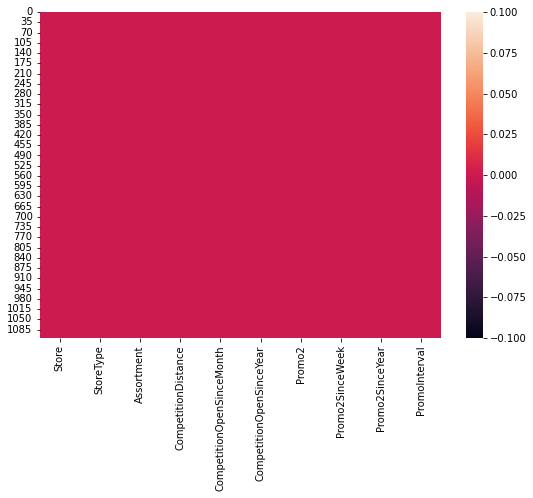

In [18]:
plt.figure(figsize=(9,6))
sns.heatmap(store_data.isna())

We've got rid of the NaN values.

##Merging Datasets and EDA
Both the datasets have Store IDs as a common field. So we can merge these two on Store Id

In [9]:
dataset=pd.merge(rossman_data,store_data,on='Store')

In [10]:
print(f"Rossman DF shape: {rossman_data.shape}")
print(f"Store_data shape: {store_data.shape}")
print(f"Merged dataset shape: {dataset.shape}")

Rossman DF shape: (1017209, 9)
Store_data shape: (1115, 10)
Merged dataset shape: (1017209, 18)


The dataset has been merged succesfuly.
Let's look into it

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

No null values present

In [22]:
#Statistical Summary
dataset.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.422021e+03,7.787777e+00,2.010060e+03,5.005638e-01,1.164767e+01,1.007011e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.706918e+03,2.778755e+00,5.340757e+00,4.999999e-01,1.532393e+01,1.005877e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000e+00,1.900000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,6.000000e+00,2.008000e+03,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.325000e+03,9.000000e+00,2.012000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,2.013000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03


Let's dive deep into the data


In [23]:
dataset.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [24]:
#Let's look into the stores and there sales
store_sales_df=dataset.groupby('Store')['Sales'].sum().reset_index().sort_values('Sales',ascending=False)
store_sales_df

,Store,Sales
261,262,19516842
816,817,17057867
561,562,16927322
1113,1114,16202585
250,251,14896870
...,...,...
262,263,2306075
207,208,2302052
197,198,2268273
542,543,2179287


**Remarks**

Store 262 is the one that has cumulatively made highest sales, summing up to 19516842.

Store 307 has had least cumulative sales of 2114322

In [25]:
#Before we do any timeline analysis, let's convert the date column to year, month and day.
dataset['Date']=pd.to_datetime(dataset['Date']) #This would change the date format from string to datetime type

#Now let's add Year, month and Day column
dataset['Year']=dataset['Date'].dt.year
dataset['Month']=dataset['Date'].dt.month
dataset['Day']=dataset['Date'].dt.day

Let's have a look at some timelines

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


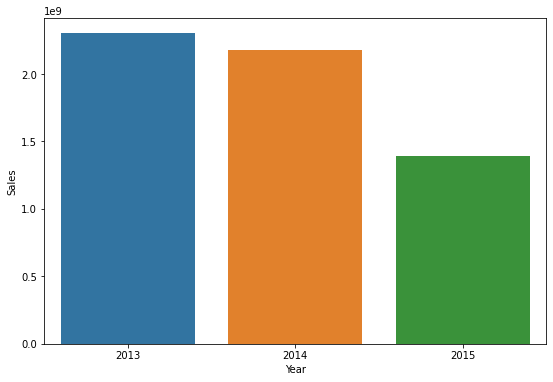

In [26]:
sale_year_timeline=dataset.groupby('Year')['Sales'].sum().reset_index()
plt.figure(figsize=(9,6))
sns.barplot(sale_year_timeline.Year,sale_year_timeline.Sales)

We can see a trend of fall in sales over the years.
Let's look into the mmonth wise sales to see if this holds true.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


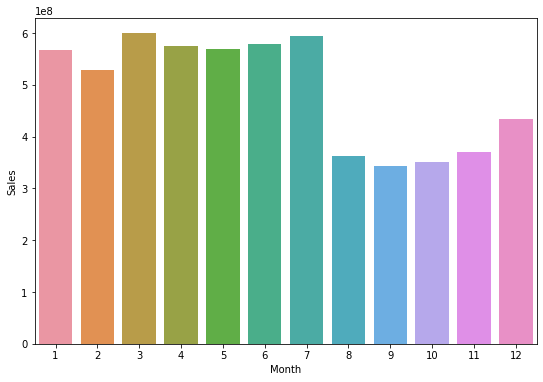

In [27]:
sales_by_month=dataset.groupby('Month')['Sales'].sum().reset_index()
plt.figure(figsize=(9,6))
sns.barplot(sales_by_month.Month,sales_by_month.Sales)
plt.show()

March month cumulatively has recorded the highest sales in three years.
Sales are observed to be doing better in the first 7 months of a given year. Or so it appears. Let's have a look at the monthly sales in each year.

In [28]:
#Creating dataframes grouped by month for each year.
Sales_2013=dataset[dataset.Year==2013].groupby('Month')['Sales'].sum().reset_index()
Sales_2014=dataset[dataset.Year==2014].groupby('Month')['Sales'].sum().reset_index()
Sales_2015=dataset[dataset.Year==2015].groupby('Month')['Sales'].sum().reset_index()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


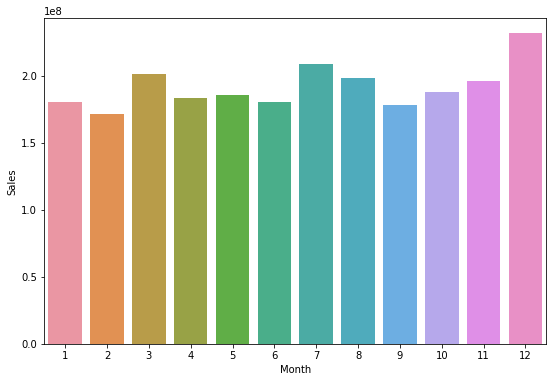

In [29]:
#2013 sales
plt.figure(figsize=(9,6))
sns.barplot(Sales_2013.Month,Sales_2013.Sales)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


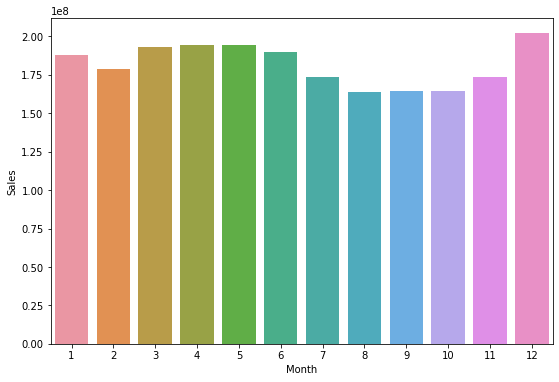

In [30]:
#2014 Sales
plt.figure(figsize=(9,6))
sns.barplot(Sales_2014.Month,Sales_2014.Sales)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


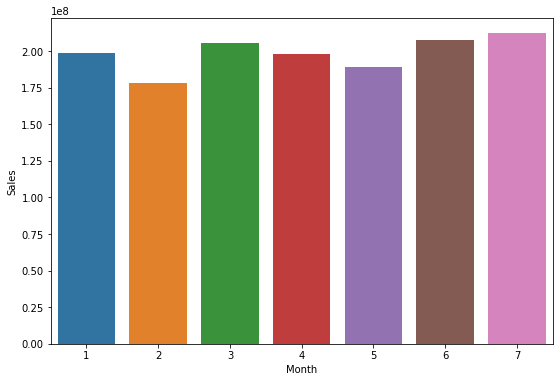

In [31]:
#2015 Sales
plt.figure(figsize=(9,6))
sns.barplot(Sales_2015.Month,Sales_2015.Sales)
plt.show()

So as opposed to our previous conclusions, we can observe that month of december has recorded highest sales in the year 2013, and 2014. 
The reason that the cumulative sales goes down is that we don't have data from Aug 2015 to Dec 2015. 
So we can safely assume that the sales generally tend to grow towards the year end. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


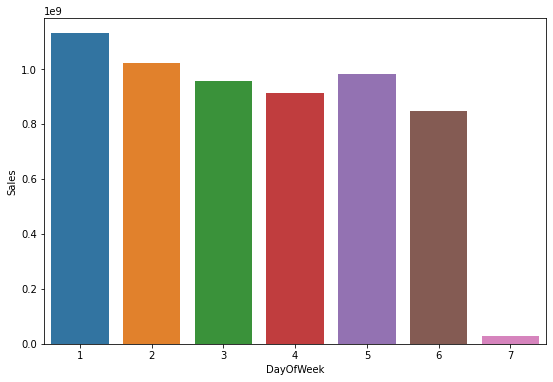

In [32]:
#Let's which day of the week is the busiest
day_of_week_sales=dataset.groupby('DayOfWeek')['Sales'].sum().reset_index()
plt.figure(figsize=(9,6))
sns.barplot(day_of_week_sales.DayOfWeek,day_of_week_sales.Sales)

We can see that the Mondays have generated the most sales, and sundays the least.
Let's confirm if this is a solid pattern, by analysing weekly sales year wise

In [33]:
weekly_sales_2013=dataset[dataset.Year==2013].groupby('DayOfWeek')['Sales'].sum().reset_index()
weekly_sales_2014=dataset[dataset.Year==2014].groupby('DayOfWeek')['Sales'].sum().reset_index()
weekly_sales_2015=dataset[dataset.Year==2015].groupby('DayOfWeek')['Sales'].sum().reset_index()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


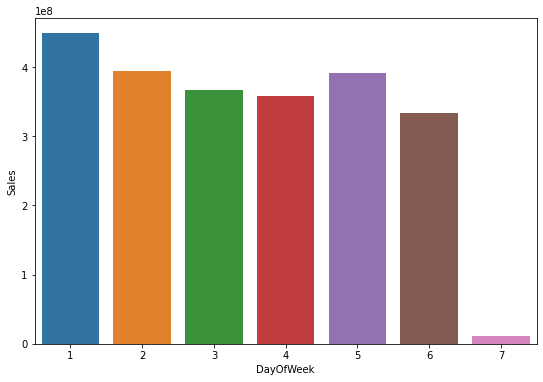

In [34]:
#weekly sales for 2013
plt.figure(figsize=(9,6))
sns.barplot(weekly_sales_2013.DayOfWeek,weekly_sales_2013.Sales)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


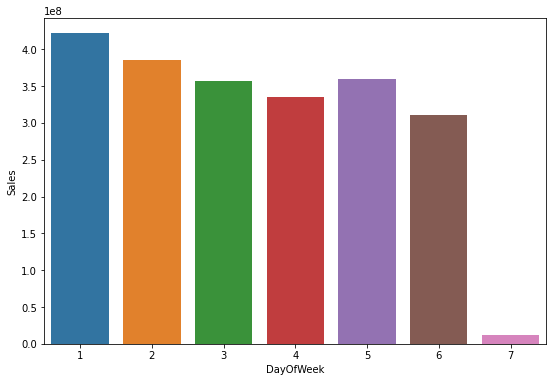

In [35]:
#weekly sales for 2014
plt.figure(figsize=(9,6))
sns.barplot(weekly_sales_2014.DayOfWeek,weekly_sales_2014.Sales)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


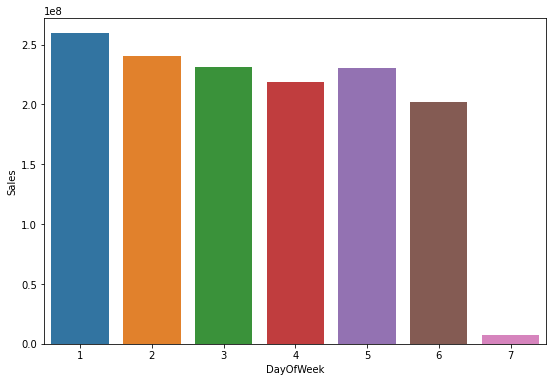

In [36]:
#weekly sales for 2015
plt.figure(figsize=(9,6))
sns.barplot(weekly_sales_2015.DayOfWeek,weekly_sales_2015.Sales)
plt.show()

We can see that the trend is strong over the years.

There's an interesting pattern to be observed here:
The sales gradually decreases from Monday to Thursday, and is met with a rise on Fridays. It would be interesting to look into the factors that causes this.

In [37]:
#Let's see which store brings in most customers.

dataset.groupby('Store')['Customers'].sum().reset_index().sort_values('Customers',ascending=False)

,Store,Customers
732,733,3206058
261,262,3204694
561,562,2924960
768,769,2902351
1113,1114,2509542
...,...,...
701,702,215970
572,573,208622
253,254,201507
406,407,195715


Store number 733 has the most number of customer visit, and is closely followed by store 262. 

Store number 543 has had least customer traffic.

In [38]:
#Let's look at the days these stores were open and closed
dataset.groupby('Store')['Open'].sum().reset_index().sort_values('Open',ascending=False)

,Store,Open
768,769,942
1096,1097,942
84,85,942
561,562,942
261,262,942
...,...,...
908,909,607
99,100,606
743,744,605
347,348,597


We now learn that not every store has remained open for same amount of period. Could be due to the fact that these stores are more recent than others. And also that some of the stores are open on holidays as well

Let's take a look at the average sales of stores per day, over the days they were open. This way we can assess store performance irrespective of how many days they were operational.

In [39]:
dataset[dataset.Open==1].groupby('Store')['Sales'].mean().reset_index().sort_values('Sales',ascending=False).rename(columns={'Sales':'Avg Sales'})

,Store,Avg Sales
816,817,21757.483418
261,262,20718.515924
1113,1114,20666.562500
250,251,19123.068036
841,842,18574.795820
...,...,...
840,841,2972.608974
207,208,2936.290816
197,198,2900.604859
542,543,2790.380282


We see that store 817 has the highest average sales per store, closely followed by store 262. 

Let's see which store runs the most promos

In [40]:
dataset.groupby('Store')['Promo'].sum().reset_index().sort_values('Promo',ascending=False)

,Store,Promo
0,1,360
725,726,360
707,708,360
708,709,360
712,713,360
...,...,...
637,638,286
636,637,286
635,636,286
940,941,286


we can see that most stores have run more or less the same number of promos over the years: 360

In [41]:
dataset.groupby('Month')['Promo'].sum().reset_index().sort_values('Promo',ascending=False)

,Month,Promo
2,3,42370
6,7,41145
3,4,40140
4,5,40140
0,1,39025
5,6,36795
1,2,33450
10,11,25175
7,8,23665
9,10,23305


We see that month of March has cumulatively held most number of promotions. But as we have seen before, absence of over 5 months of data in 2015 would affect this observation.

In [42]:
#Let's look at the promos that most and least successful; Store number 262 and 306  have run

print(f" Promos by store 262: {dataset[dataset.Store==262]['Promo'].sum()}")
print(f" Promos by store 306: {dataset[dataset.Store==306]['Promo'].sum()}")

 Promos by store 262: 360
 Promos by store 306: 286


There is a significant difference between the Promos run by these two stores. So we may come to find further down the analysis, that Promotions are significantly correlated to sales.

In [43]:
#Let's look at number of days store were closed and open
Open_close=dataset['Open'].value_counts().reset_index().rename(columns={'index':'Open or Close','Open':'Count'})
Open_close

,Open or Close,Count
0,1,844392
1,0,172817


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


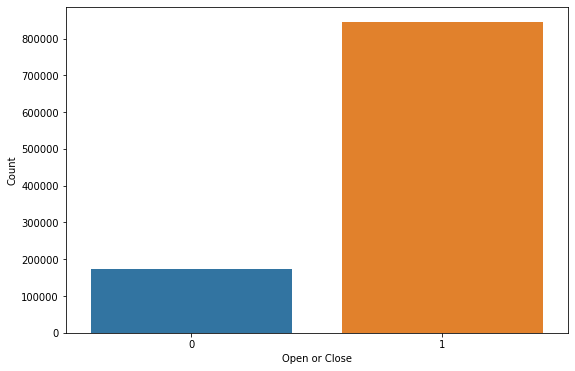

In [44]:
plt.figure(figsize=(9,6))
sns.barplot(Open_close['Open or Close'],Open_close.Count)

As we can see, the number of days, the stores were open were much more than ones they were closed. 

So we may have to discuss if we need to eliminate the column altogether by keeping the records of the days the stores were open.



Store Type Count

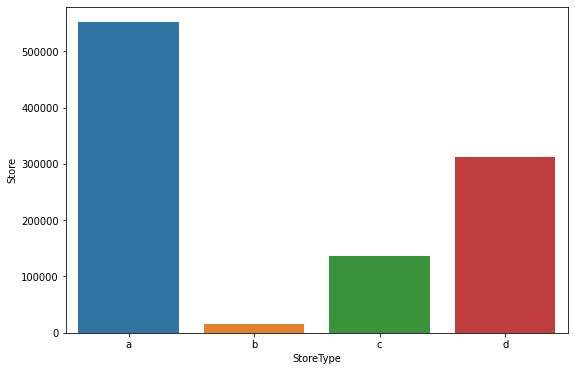

In [45]:
df=dataset.groupby('StoreType')['Store'].count().reset_index()
plt.figure(figsize=(9,6))
sns.barplot(x=df.StoreType,y=df.Store)

Store Type a is most common, followed by d, c and b.

Store type b count seems negligible in contrast with the rest, so we just might omit it altogetherm in later part of the analysis.

Let's look into assortments

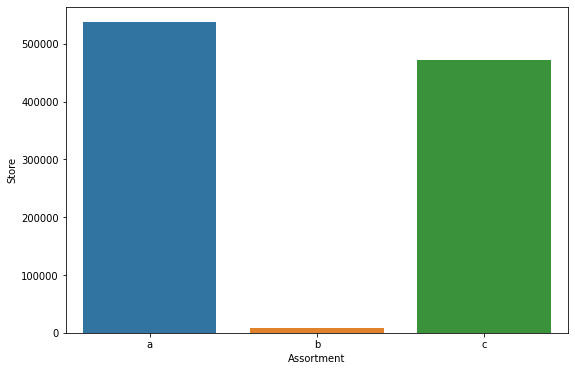

In [46]:
df=dataset.groupby('Assortment')['Store'].count().reset_index()
plt.figure(figsize=(9,6))
sns.barplot(x=df.Assortment,y=df.Store)

Assortment a is most common, followed by c and b.

Also assortment b count is quite negligible, so we might treat it the same way store type b

In [47]:
dataset.columns


Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day'],
      dtype='object')

Competition Distance

In [48]:
df_dist=dataset.groupby('Store')['CompetitionDistance'].median().reset_index().sort_values('CompetitionDistance',ascending=False)
df_dist

,Store,CompetitionDistance
452,453,75860.0
121,122,58260.0
800,801,48330.0
109,110,46590.0
746,747,45740.0
...,...,...
620,621,30.0
881,882,30.0
987,988,30.0
1007,1008,30.0


We see that store 453 is the most isolated one in terms of presence of competition nearby. 

And store 516 has a competitor just 20 metres away from it.

Let's look at sales figure of stores as distance from competition increases.

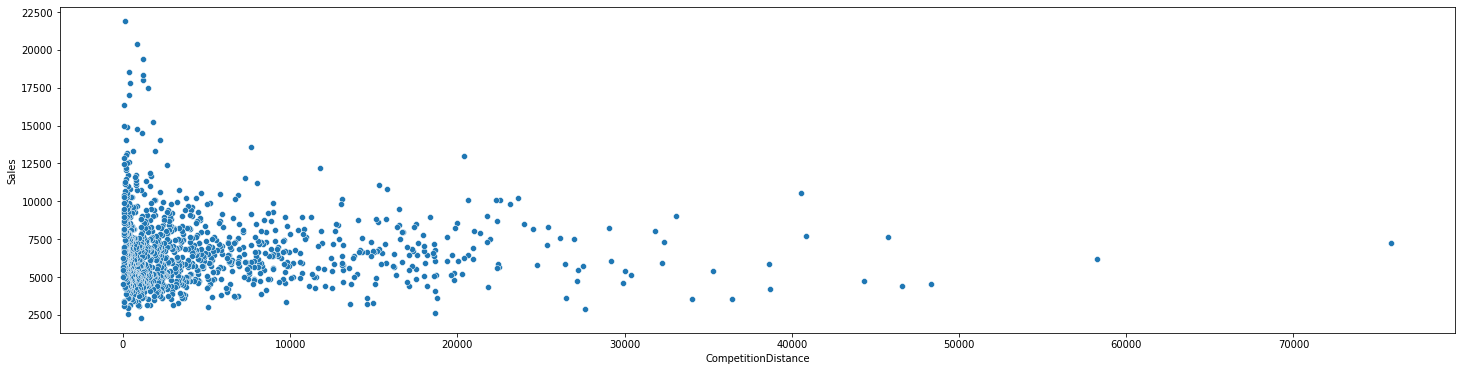

In [49]:
df_sales=dataset[dataset.Open==1].groupby('Store')['Sales'].median().reset_index()
df_merged=pd.merge(df_dist,df_sales,on='Store')

plt.figure(figsize=(25,6))
sns.scatterplot(x=df_merged.CompetitionDistance,y=df_merged.Sales)

We see that majority of sales are concentrated towards the lower range of competition distances. I expected to see the sales of Rossman stores to go up when competition distance increases as there'd be less option for customers to choose from. But that's not the case.

The stores which have competitions in close proximity are likely to be situated in Urban areas, where purchase power of customers is considerably high. Which might be the reason behind high sales, despite high competition.

CompetitionSinceMonth, CompetitionSinceYear, Promo2SinceWeek and Promo2SinceYear column have integer values but are represented as float. We can change that.

In [50]:
dataset['CompetitionOpenSinceMonth']=dataset['CompetitionOpenSinceMonth'].astype(int)
dataset['CompetitionOpenSinceYear']=dataset['CompetitionOpenSinceYear'].astype(int)
dataset['Promo2SinceWeek']=dataset['Promo2SinceWeek'].astype(int)
dataset['Promo2SinceYear']=dataset['Promo2SinceYear'].astype(int)


##Handling Outliers


In [51]:
#Let's define our numerical, categorical and target variables
numerical_features= [feat for feat in dataset.describe(include=np.number).columns if feat not in['Sales']]
categorical_features =[feat for feat in dataset.describe(exclude=np.number).columns if feat not in['Date']] #Omitting date here since we have stored it as year, month and day in 3 seperate columns
target_variable=['Sales']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  This is separate from the ipykernel package so we can avoid doing imports until


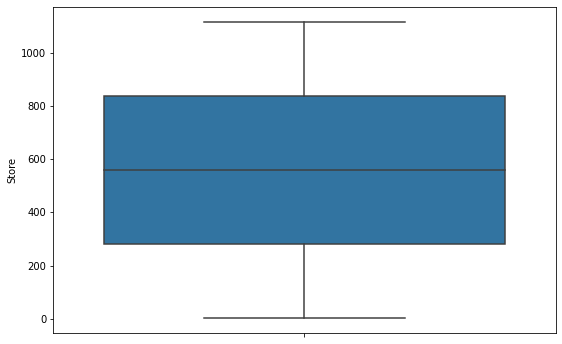

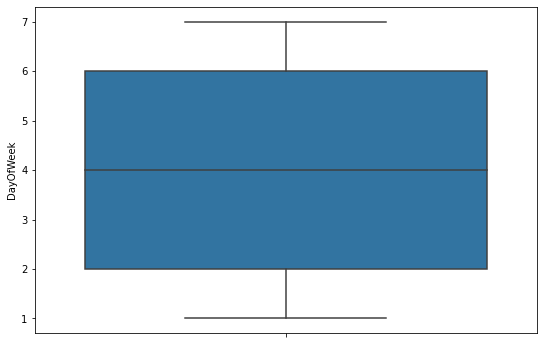

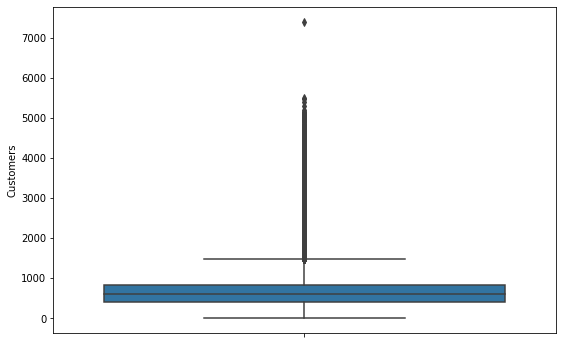

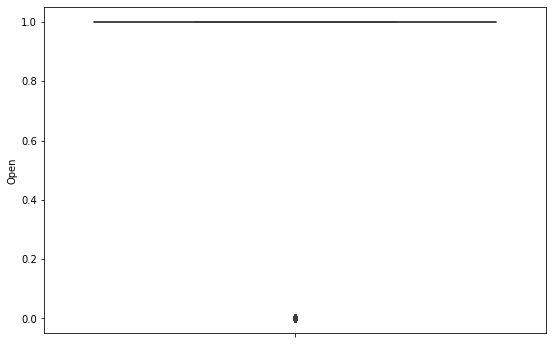

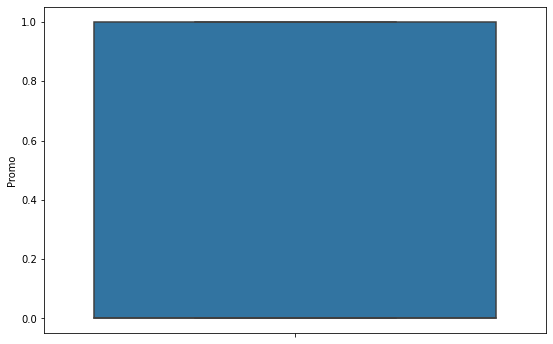

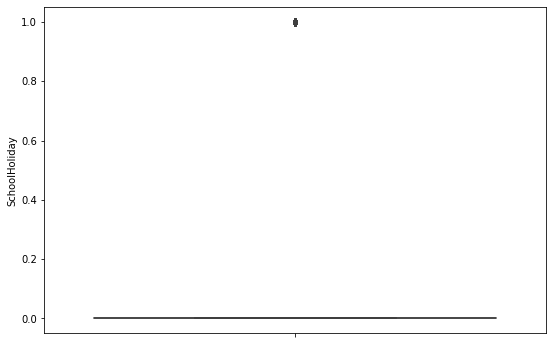

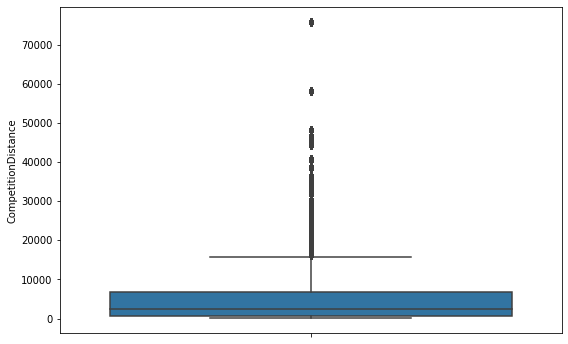

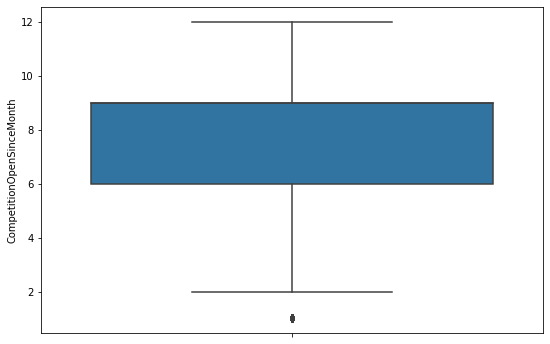

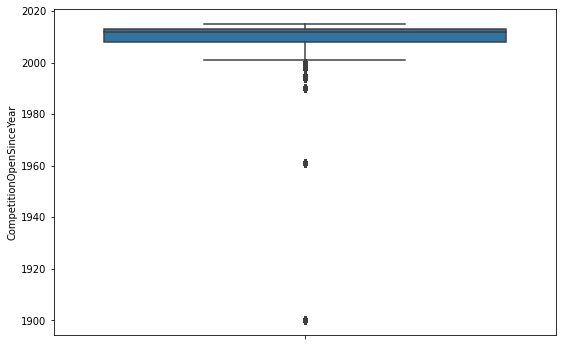

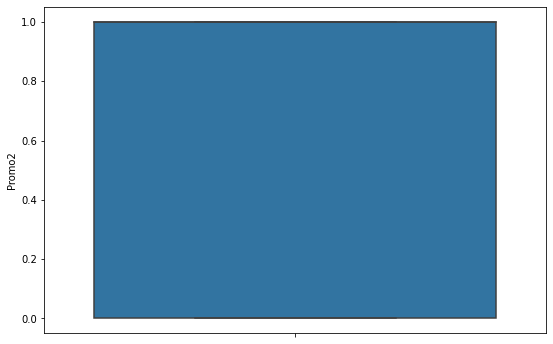

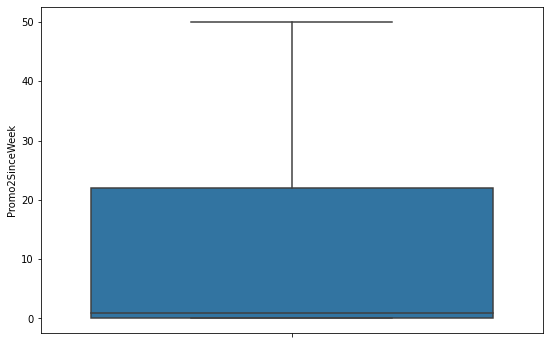

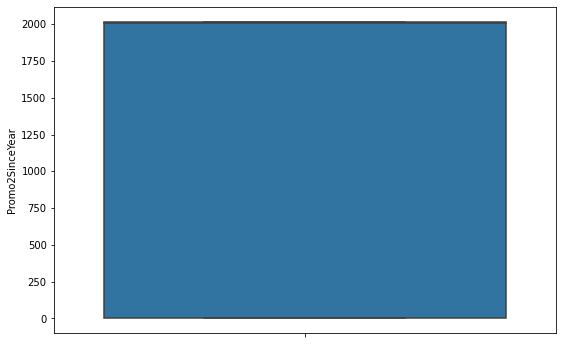

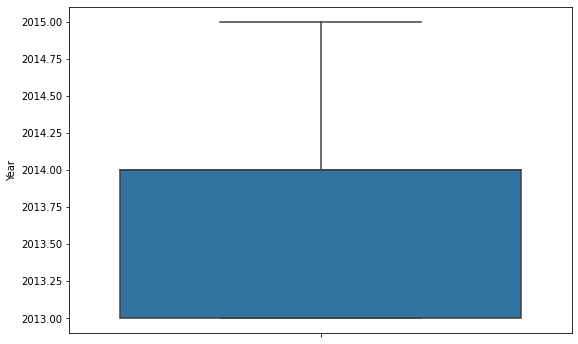

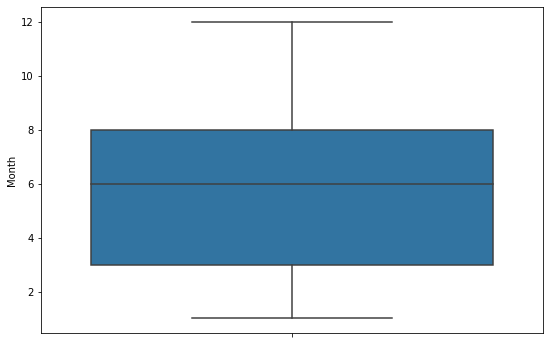

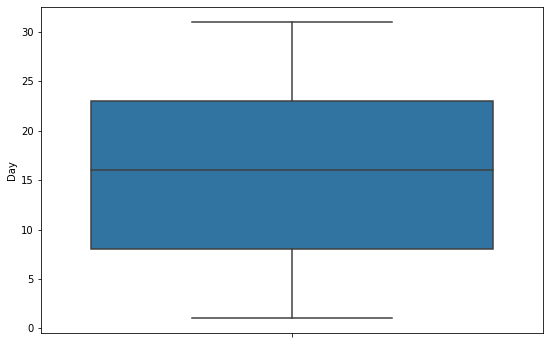

In [52]:
#Let's look into outliers in numerical features
for col in numerical_features:
  plt.figure(figsize=(9,6))
  fig=sns.boxplot(y=dataset[col])
  fig.set_title('')
  fig.set_ylabel(col)

  plt.show()

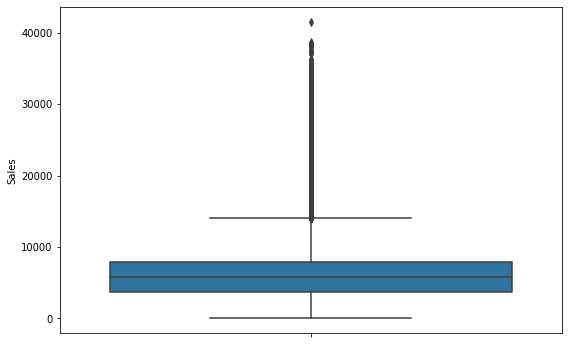

In [53]:
#Outliers in target_variable
plt.figure(figsize=(9,6))
fig=sns.boxplot(y=dataset['Sales'])
fig.set_title('')
fig.set_ylabel('Sales')

plt.show()

We have detected presence of outliers in the following columns:

Customers

Competiton Distance

CompetitionOpenSinceMonth

CompetitionOpenSinceYear

And also in our dependant variable Sales

Since regression is quite sensitive to outliers, we need to remove these.

But, in Customers, and Sales the distribution of outliers is quite uniform and large numbers. Removing these might strip off the model of some important pattern. So let's omit these from the outlier removal process.

I'll use IQR method to remove outliers here. Before that, let's make a copy of the dataset to work on, so that we can store the original records in the previous dataset.

In [54]:
dataset_pr=dataset.copy()
dataset_pr.shape

(1017209, 21)

In [55]:
#Implementing IQR method to remove outliers
for col in ['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear']:
  q1=dataset_pr[col].quantile(0.25)
  q3=dataset_pr[col].quantile(0.75)
  iqr=q3-q1
  
  upper_limit=q3+(1.5*iqr)
  lower_limit=q1-(1.5*iqr)

  dataset_pr.loc[(dataset_pr[col] > upper_limit),col] = upper_limit
  dataset_pr.loc[(dataset_pr[col] < lower_limit),col] = lower_limit




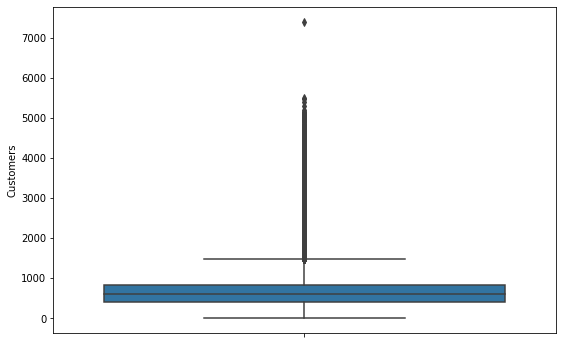

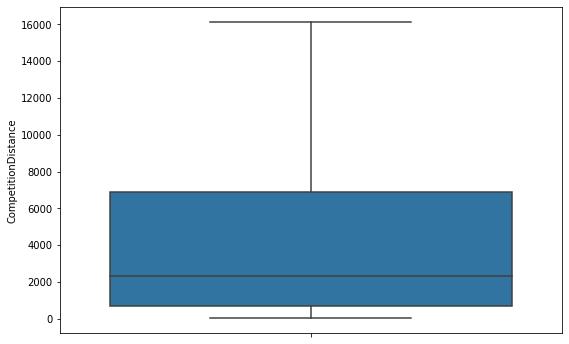

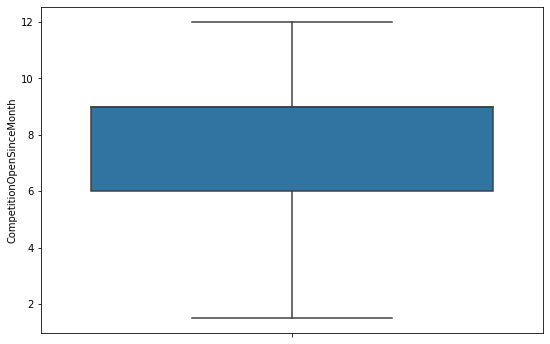

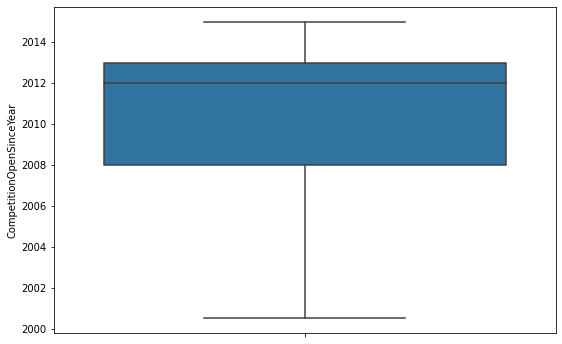

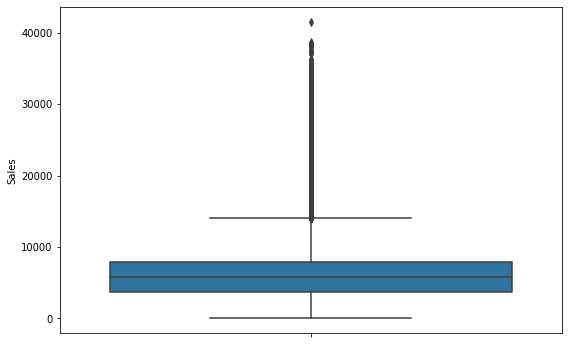

In [56]:
for col in ['Customers','CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Sales']:
  plt.figure(figsize=(9,6))
  fig=sns.boxplot(y=dataset_pr[col])
  fig.set_title('')
  fig.set_ylabel(col)

  plt.show()

As we see, the outliers have been removed from the numerical features.

<Figure size 648x432 with 0 Axes>

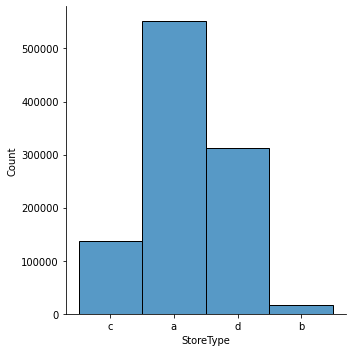

<Figure size 648x432 with 0 Axes>

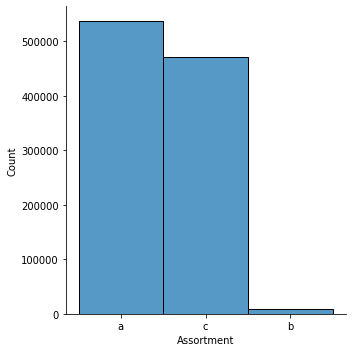

<Figure size 648x432 with 0 Axes>

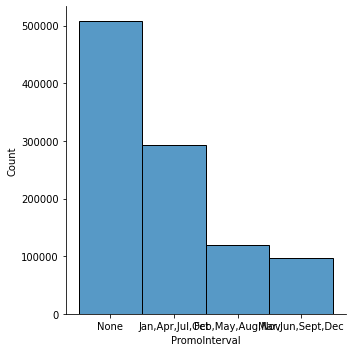

In [57]:
for col in categorical_features:
  if col not in ['StateHoliday']:
    plt.figure(figsize=(9,6))
    sns.displot(x=dataset[col])

So as discussed before, it might be a good idea to remove store type b and assortment b from the feature after one-hot encoding

##Target feature conditioning.

Let's look into our dependent variable: Sales

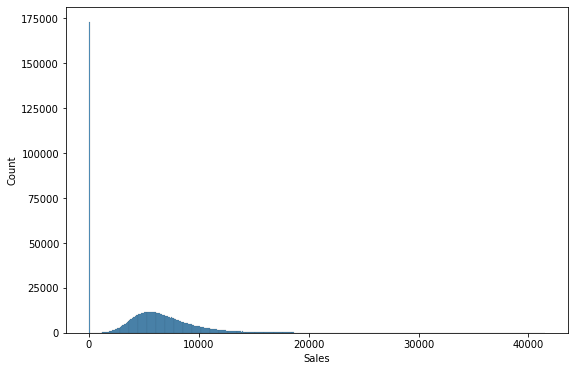

In [58]:
#Let's look at the distribution of our dependent variable first

plt.figure(figsize=(9,6))
sns.histplot(dataset_pr['Sales'])

We see a peak at 0, which is due to days that stores were closed on.

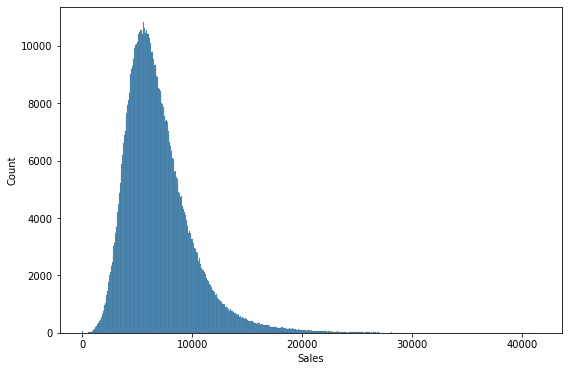

In [59]:
plt.figure(figsize=(9,6))
sns.histplot(dataset[dataset_pr.Open==1]['Sales'])

This looks skewed slightly to the right. Square root transformation might help with that.

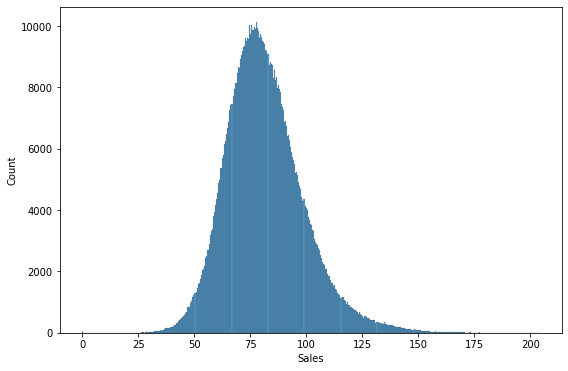

In [60]:
#applying square root transformation
plt.figure(figsize=(9,6))
sns.histplot(np.sqrt(dataset[dataset_pr.Open==1]['Sales']))

This distribution resembles a gaussian one much more closely now. 

##Numerical features V/S Sales 

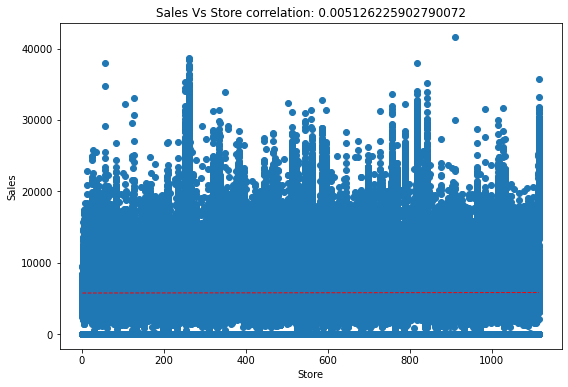

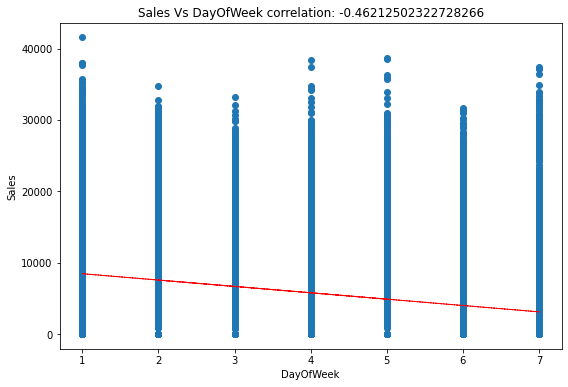

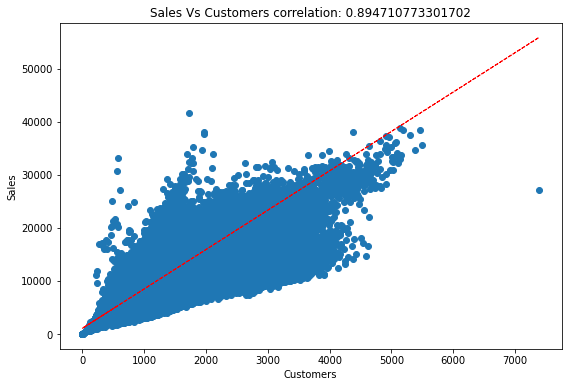

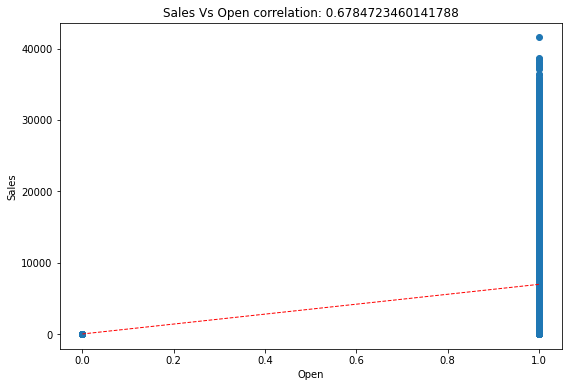

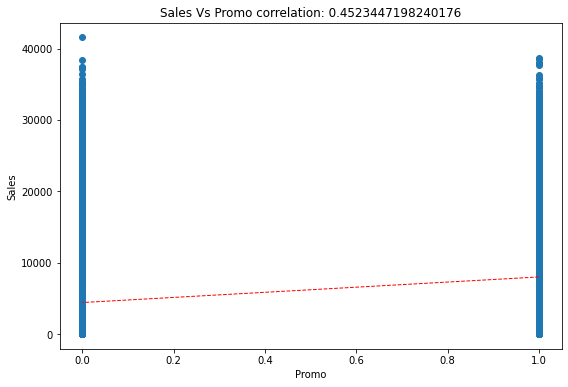

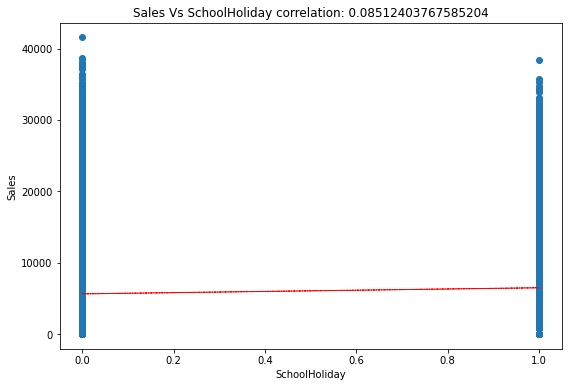

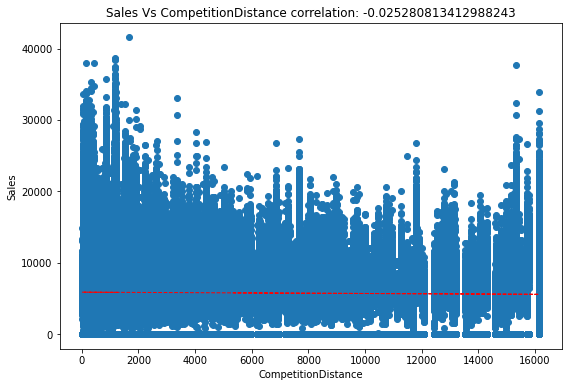

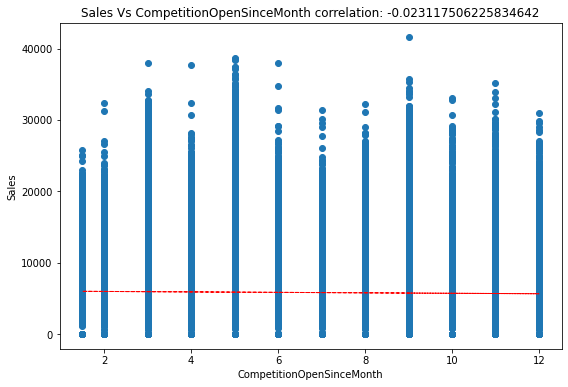

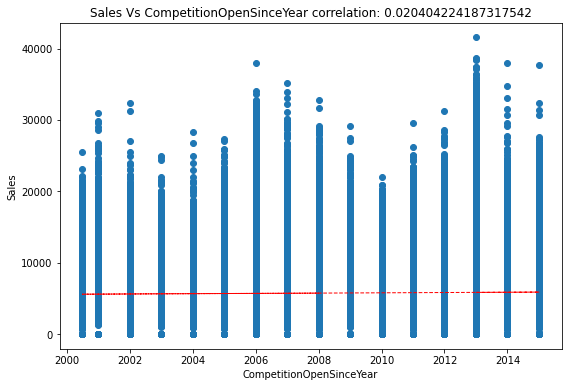

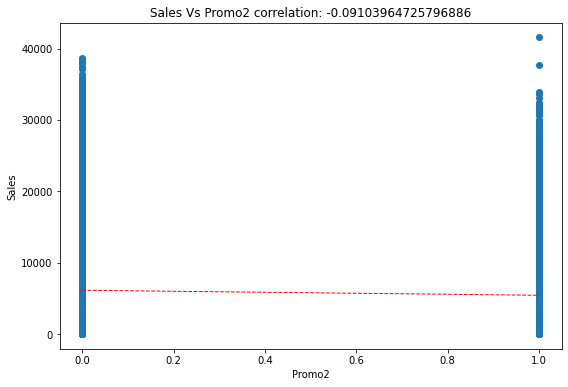

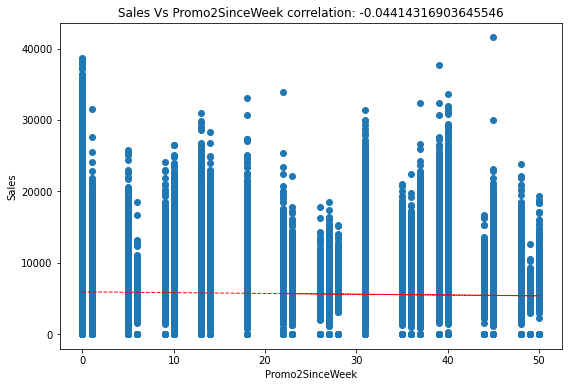

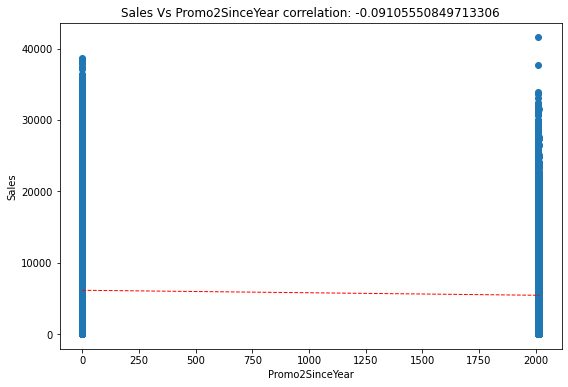

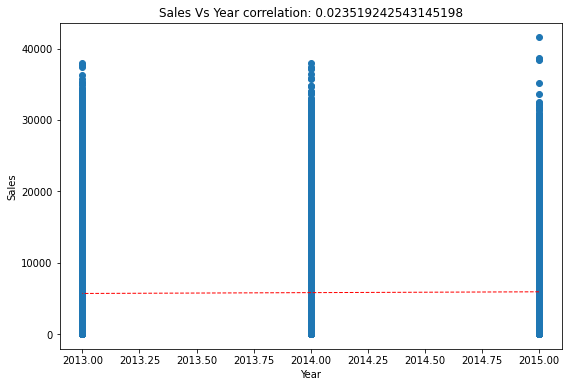

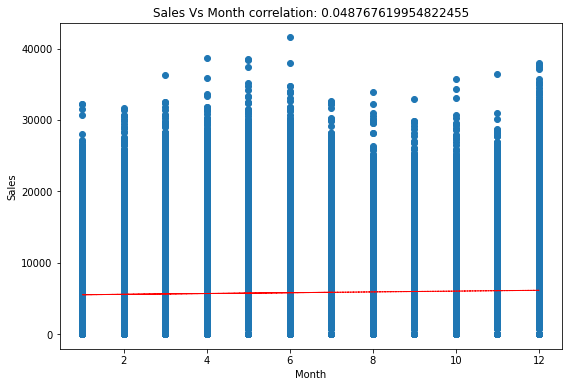

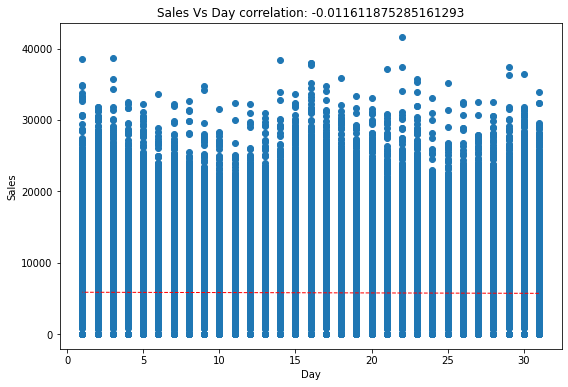

In [61]:
for col in numerical_features:
  if col not in ['Date','StateHoliday','Sales']:
    fig=plt.figure(figsize=(9,6))
    ax=fig.gca()
    feature=dataset_pr[col]
    label=dataset_pr['Sales']
    correlation=feature.corr(label)
    plt.scatter(x=feature,y=label)
    plt.xlabel(col)
    plt.ylabel('Sales')
    ax.set_title('Sales Vs '+col + ' correlation: ' + str(correlation) )
    z=np.polyfit(feature,label,1)
    y_hat=np.poly1d(z)(dataset_pr[col])

    plt.plot(dataset_pr[col],y_hat,"r--",lw=1)

  plt.show()





Considerable correlations are observed at:

Sales Vs Customers

Sales Vs DayOfWeek

Salse Vs Promo

##Categorical Features V/S Sales

First of all we need to encode the categorical features with numerical values to be able to incorporate them into the model.

In [62]:
# One hot encoding
dataset_pr = pd.get_dummies(dataset_pr, columns=['StateHoliday','StoreType','Assortment','PromoInterval'], prefix=["StateH", "S_Type","Assortment","PromoInterval"])

In [63]:
dataset_pr

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,StateH_0,StateH_0,StateH_a,StateH_b,StateH_c,S_Type_a,S_Type_b,S_Type_c,S_Type_d,Assortment_a,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",PromoInterval_None
0,1,5,2015-07-31,5263,555,1,1,1,1270.0,9.0,2008.0,0,0,0,2015,7,31,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1
1,1,4,2015-07-30,5020,546,1,1,1,1270.0,9.0,2008.0,0,0,0,2015,7,30,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1
2,1,3,2015-07-29,4782,523,1,1,1,1270.0,9.0,2008.0,0,0,0,2015,7,29,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1
3,1,2,2015-07-28,5011,560,1,1,1,1270.0,9.0,2008.0,0,0,0,2015,7,28,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1
4,1,1,2015-07-27,6102,612,1,1,1,1270.0,9.0,2008.0,0,0,0,2015,7,27,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,1,5350.0,9.0,2013.0,1,22,2012,2013,1,5,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0
1017205,1115,5,2013-01-04,4540,326,1,0,1,5350.0,9.0,2013.0,1,22,2012,2013,1,4,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0
1017206,1115,4,2013-01-03,4297,300,1,0,1,5350.0,9.0,2013.0,1,22,2012,2013,1,3,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0
1017207,1115,3,2013-01-02,3697,305,1,0,1,5350.0,9.0,2013.0,1,22,2012,2013,1,2,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0


##Feature Selection

###Multicolinearity

Let's look into multicolinearity in the dataset first. 

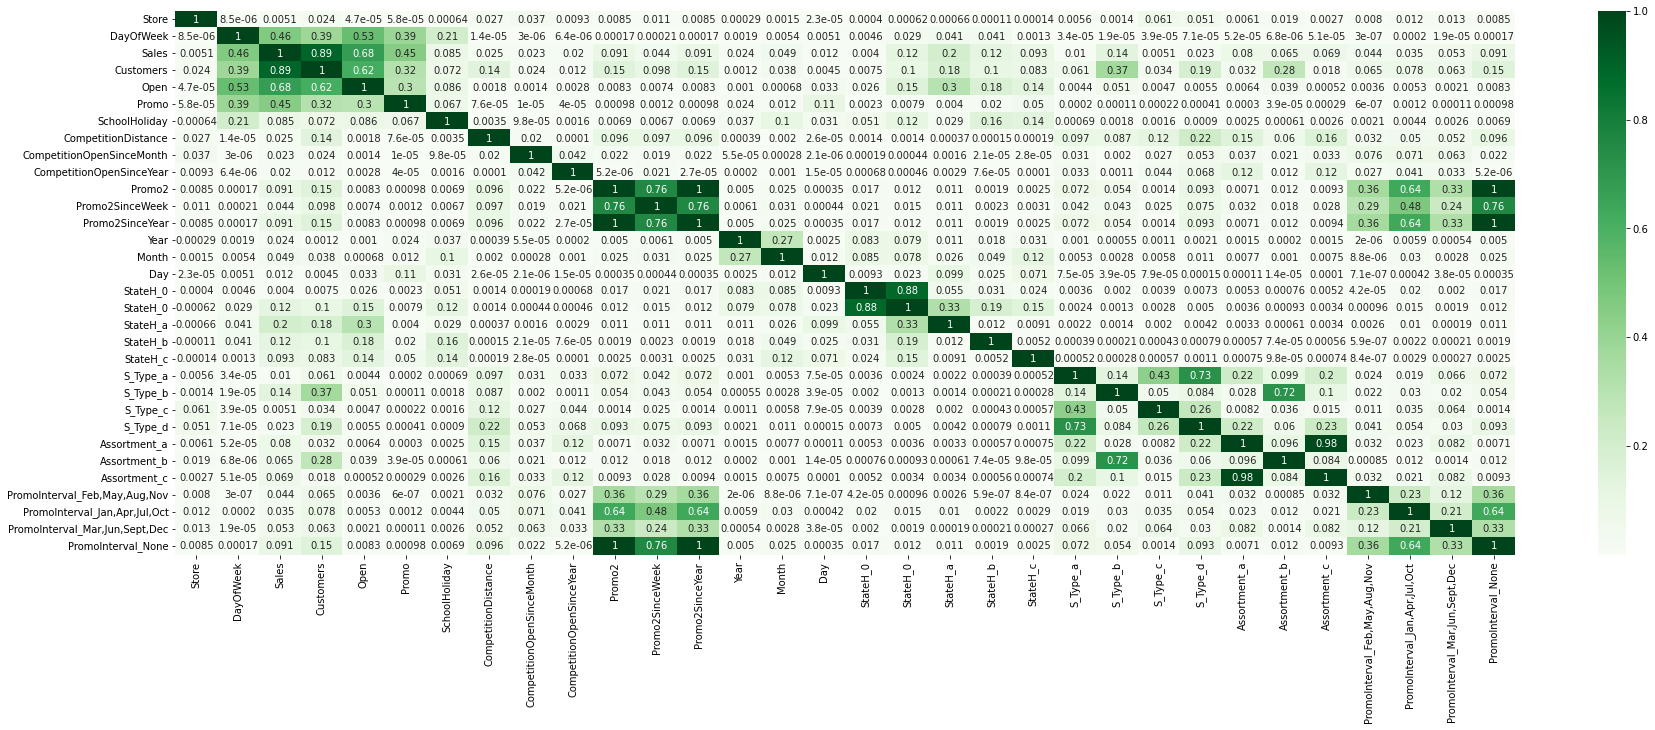

In [64]:
#a heatmap would help us to get a overview of correlation condition
plt.figure(figsize=(30,10))

correlation=dataset_pr.corr()

sns.heatmap(abs(correlation),annot=True,cmap='Greens')

We can see there's quite a few instances odf multicolinearity in the dataset, which requires to be handled.

We can start by taking away features by guestimates.

For instance, assortment b and store type b as mentioned before have negligible count

In [65]:
feature_to_remove=['Assortment_b','S_Type_b']

  Following features have extremely low correaltion with sales:
  
  Store, Stateh_0 and store type c, Promo 2, CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear,Promo2SinceWeek, Day, S_type_d, Promo_interval_Jan_april_jul_oct
  
Let's add these to the dump as well

In [66]:
feature_to_remove=['Store','Assortment_b','S_Type_b','S_type_c','StateH_0','S_Type_c','Promo2','CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Day','S_Type_d','PromoInterval_Jan,Apr,Jul,Oct','Sales','Promo2SinceYear','Promointerval_None','PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec','S_Type_a','Date']

Asoortment a and Assortment c have high correlation and assortment a has better correlation with sales so we will omit assortment c

In [67]:
feature_to_remove.append('Assortment_c')

As for the features left out, let's use VIF to detect multicolinearity and further trim down our list prospects.

Let's keep a filter of VIF=10

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#defining function to calculate VIF
def calc_vif(X):
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  return(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [69]:
calc_vif(dataset_pr[[i for i in dataset_pr.describe().columns if i not in (feature_to_remove)] ] )

,variables,VIF
0,DayOfWeek,8.553595
1,Customers,4.969602
2,Open,13.777009
3,Promo,1.995819
4,SchoolHoliday,1.346284
5,Year,32.935062
6,Month,4.212767
7,StateH_a,1.225258
8,StateH_b,1.118830
9,StateH_c,1.075896


Year has high VIF. Let's remove that.

In [70]:
feature_to_remove.append('Year')

In [71]:
calc_vif(dataset_pr[[i for i in dataset_pr.describe().columns if i not in (feature_to_remove)] ] )

,variables,VIF
0,DayOfWeek,3.210494
1,Customers,4.969416
2,Open,7.482442
3,Promo,1.902145
4,SchoolHoliday,1.336638
5,Month,3.818019
6,StateH_a,1.070407
7,StateH_b,1.061704
8,StateH_c,1.060964
9,Assortment_a,2.046793


Looks good now. The features present here aren't much correalated to each other.

In [72]:
feature_to_remove

['Store',
 'Assortment_b',
 'S_Type_b',
 'S_type_c',
 'StateH_0',
 'S_Type_c',
 'Promo2',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2SinceWeek',
 'Day',
 'S_Type_d',
 'PromoInterval_Jan,Apr,Jul,Oct',
 'Sales',
 'Promo2SinceYear',
 'Promointerval_None',
 'PromoInterval_Feb,May,Aug,Nov',
 'PromoInterval_Jan,Apr,Jul,Oct',
 'PromoInterval_Mar,Jun,Sept,Dec',
 'S_Type_a',
 'Date',
 'Assortment_c',
 'Year']

In [73]:
final_features=[i for i in dataset_pr.columns if i not in feature_to_remove]
final_features

['DayOfWeek',
 'Customers',
 'Open',
 'Promo',
 'SchoolHoliday',
 'Month',
 'StateH_a',
 'StateH_b',
 'StateH_c',
 'Assortment_a',
 'PromoInterval_None']

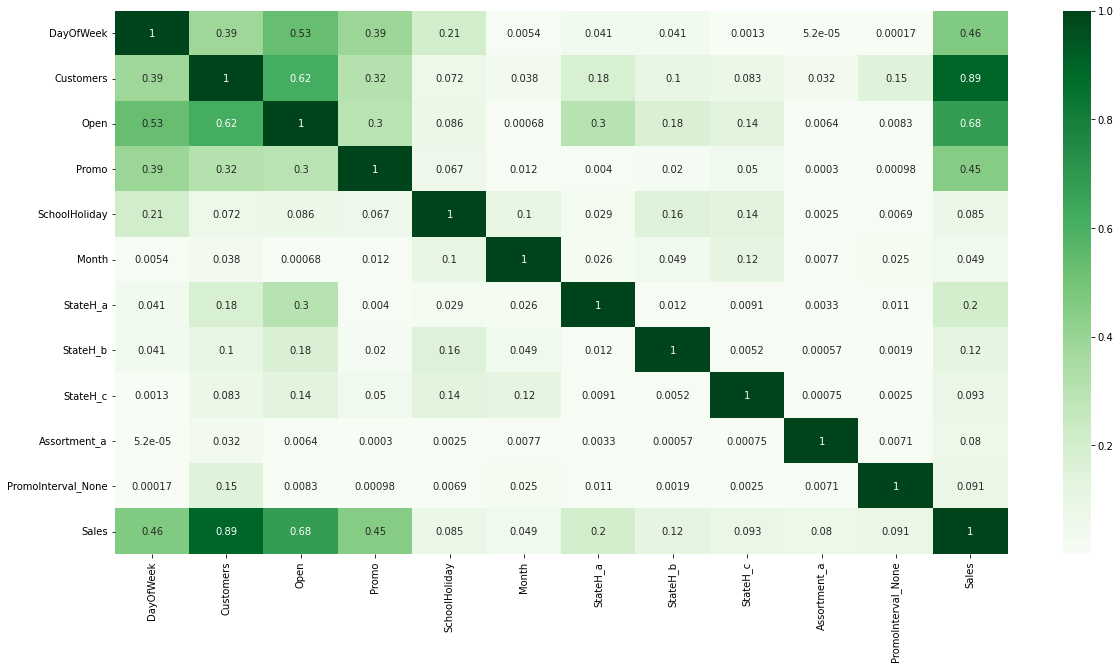

In [74]:
plt.figure(figsize=(20,10))
final_features.append('Sales') #to look into the correlation
correlation=dataset_pr[final_features].corr()
sns.heatmap(abs(correlation),annot=True,cmap='Greens')

In [75]:
final_features=[i for i in dataset_pr.columns if i not in feature_to_remove]
final_features

['DayOfWeek',
 'Customers',
 'Open',
 'Promo',
 'SchoolHoliday',
 'Month',
 'StateH_a',
 'StateH_b',
 'StateH_c',
 'Assortment_a',
 'PromoInterval_None']

As we can see here, we have been able to select decently corelated variables with Sales and there isn't serious instance of multicolinearity

##Model Implimentation

###Data Prepping

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X=dataset_pr[final_features]
Y=np.sqrt(dataset_pr['Sales'])  #to normalise the distribution

In [78]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42) #loading train and test data along with answer to The life, the Universe and everything

In [79]:
#scaling the data
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

###Linear Regression

In [80]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(x_train,y_train) #Fitting linear regression

In [81]:
reg.score(x_train,y_train) #checking regression score.

0.9386726783767049

In [82]:
y_pred=reg.predict(x_test) #predicitng using trained model 
pred_train=reg.predict(x_train)

In [83]:
#computing MSE and MSE

from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error((y_test),(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 73.07902862993066
RMSE : 8.54862729506502


In [84]:
#Computing R2 score
from sklearn.metrics import r2_score
r2 = r2_score((y_test), (y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

R2 : 0.9386021632214686
Adjusted R2 :  0.9385999499689983


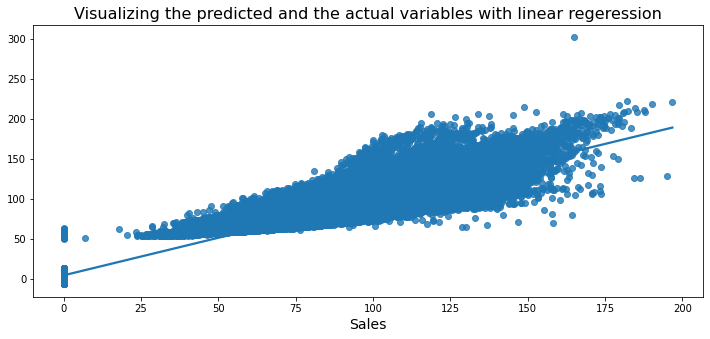

In [85]:
#plotting training dataset
plt.figure(figsize=(12, 5))
sns.regplot(x=y_test, y=y_pred)
plt.xticks
plt.title('Visualizing the predicted and the actual variables with linear regeression', size=16)
plt.xlabel('Sales', size=14)
plt.show()

In [86]:
from sklearn.model_selection import cross_validate
#implmenting the cross validation on linear regression with 5 cv_datasets
scoring = ['r2']
scores = cross_validate(reg, x_train, y_train, scoring=scoring, cv=5, 
                        return_train_score = True, return_estimator = True, verbose=10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ...................... r2: (train=0.939, test=0.938) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] END ...................... r2: (train=0.939, test=0.939) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV] END ...................... r2: (train=0.939, test=0.939) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s remaining:    0.0s


[CV] END ...................... r2: (train=0.939, test=0.938) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.4s remaining:    0.0s


[CV] END ...................... r2: (train=0.939, test=0.939) total time=   0.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.8s finished


In [87]:
scores

{'estimator': [LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression()],
 'fit_time': array([0.2626524 , 0.3059938 , 0.3112402 , 0.31716561, 0.32475352]),
 'score_time': array([0.01833153, 0.0149951 , 0.01183057, 0.00792265, 0.00872135]),
 'test_r2': array([0.9384202 , 0.93852935, 0.93904641, 0.93827509, 0.93907731]),
 'train_r2': array([0.93873503, 0.93870788, 0.9385791 , 0.93877167, 0.93857076])}

###Lasso Regularization

In [88]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=1e-05 , max_iter= 5000)

lasso.fit(x_train, y_train)

Lasso(alpha=1e-05, max_iter=5000)

In [89]:
lasso.score(x_train, y_train) 

0.9386726783759343

In [90]:
y_pred_l = lasso.predict(x_test)

In [91]:
MSE  = mean_squared_error((y_test), (y_pred_l))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_l))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_l)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 73.07902847209722
RMSE : 8.548627285833511
R2 : 0.9386021633540735
Adjusted R2 :  0.938599950101608


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


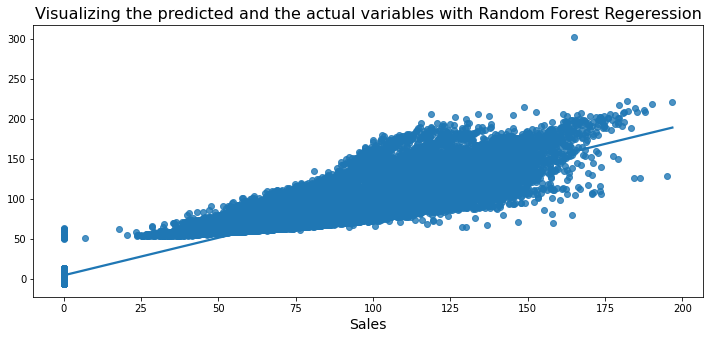

In [92]:
#ploting the outputs
plt.figure(figsize=(12, 5))
sns.regplot((y_test), (y_pred_l))
plt.title('Visualizing the predicted and the actual variables with Random Forest Regeression', size=16)
plt.xlabel('Sales', size=14)
plt.show()

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
# # Cross validation
# lasso = Lasso(max_iter=4000)
# parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
# lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
# lasso_regressor.fit(x_train, y_train)

#Grid Search for lasso regualrization is not getting converged. Keepikng in mind the computation time, let's skip lasso grid search

###Ridge Regularization

In [95]:
from sklearn.linear_model import Ridge

ridge=Ridge(max_iter=5000)

ridge.fit(x_train,y_train)

Ridge(max_iter=5000)

In [96]:
ridge.score(x_train,y_train)

0.9386726783756423

In [97]:
y_pred_ridge=ridge.predict(x_test)

In [98]:
MSE  = mean_squared_error((y_test), (y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_l)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 73.07902746957797
RMSE : 8.54862722719724
R2 : 0.9386021641963468
Adjusted R2 :  0.938599950101608


Implementing GridSearch 

In [99]:
from sklearn.model_selection import GridSearchCV

In [100]:
#Cross Validation
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=4)
ridge_regressor.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=Ridge(max_iter=5000),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [101]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 5}

Using  {'alpha': 5}  the negative mean squared error is:  -73.0917824689432


In [102]:
y_pred_ridge_cv=ridge_regressor.predict(x_test)

In [103]:
MSE  = mean_squared_error ( (y_test), (y_pred_ridge_cv) )
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_ridge_cv))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_ridge_cv)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 73.07902285352765
RMSE : 8.548626957209423
R2 : 0.9386021680745524
Adjusted R2 :  0.9385999548222571


There isn't much notable improvement upon implementing lasso and ridge regualrization.

Which may indicate that the model isn't suffering from overfit afterall.

###Elastic Net Regularization


In [104]:
from sklearn.linear_model import  ElasticNet
elasticnet=ElasticNet(alpha=1,l1_ratio=0.4)
elasticnet.fit(x_train,y_train)

ElasticNet(alpha=1, l1_ratio=0.4)

In [105]:
elasticnet.score(x_train,y_train)

0.876885379155625

In [106]:
y_pred_elastic=elasticnet.predict(x_test)

In [107]:
MSE  = mean_squared_error ( (y_test)**2, (y_pred_elastic)**2 )
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test)**2, (y_pred_elastic)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test)**2, (y_pred_elastic)**2))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 3168146.4844685798
RMSE : 1779.9287863475267
R2 : 0.785698008098957
Adjusted R2 :  0.7856902829992165


Elastic Net hasn't helped much.
Let's run gridsearch to find optimum parameters

In [108]:
# elasticnet = ElasticNet()
# parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
# elastic_regressor = GridSearchCV(elasticnet, parameters, scoring='neg_mean_squared_error',cv=5)
# elastic_regressor.fit(x_train, y_train)

#elasticnet gridsearch is not able to converge as well. Let's skip this.

###Random Forest Regressor

In [109]:
#libraries required for random forest model
from sklearn.ensemble import RandomForestRegressor 

In [110]:
#implementing the model
rf_reg = RandomForestRegressor(random_state=42)
#training the model
rf_reg.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [111]:
rf_reg.score(x_train,y_train)

0.9831925650318711

In [112]:
#defining the predicted variable
y_pred_rf = rf_reg.predict(x_test)

In [113]:
MSE  = mean_squared_error ( (y_test), (y_pred_rf))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_rf))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_rf)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 61.7286166586586
RMSE : 7.856756115513488
R2 : 0.9481382880803564
Adjusted R2 :  0.9481364185835135


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


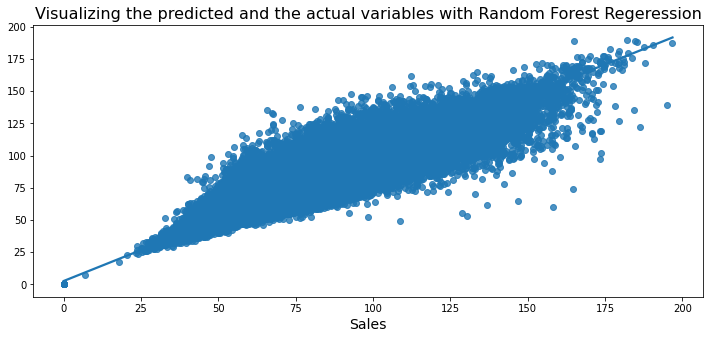

In [114]:
#ploting the outputs
plt.figure(figsize=(12, 5))
sns.regplot((y_test), (y_pred_rf))
plt.title('Visualizing the predicted and the actual variables with Random Forest Regeression', size=16)
plt.xlabel('Sales', size=14)
plt.show()

Predictions and Actual Values


In [115]:
df=pd.DataFrame(x_test)
df['predictions'] = y_pred_rf
df['actual']=pd.DataFrame(y_test).reset_index()['Sales']

In [116]:
df

,0,1,2,3,4,5,6,7,8,9,10,predictions,actual
0,-1.500700,0.835160,0.452343,-0.785379,2.142967,1.246917,-0.142294,-0.081741,-0.064015,-1.058303,1.000596,88.552898,91.301698
1,1.002102,-0.864261,0.452343,-0.785379,-0.466643,-0.255415,-0.142294,-0.081741,-0.064015,0.944909,-0.999405,44.130675,46.829478
2,0.501542,-0.375328,0.452343,-0.785379,-0.466643,-1.156814,-0.142294,-0.081741,-0.064015,0.944909,-0.999405,68.462600,73.314391
3,0.000981,-0.517485,0.452343,1.273271,-0.466643,-1.156814,-0.142294,-0.081741,-0.064015,-1.058303,1.000596,70.681080,62.537988
4,1.002102,0.066220,0.452343,-0.785379,-0.466643,1.847850,-0.142294,-0.081741,-0.064015,-1.058303,1.000596,87.944276,74.859869
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305158,-1.500700,0.076990,0.452343,1.273271,2.142967,1.246917,-0.142294,-0.081741,-0.064015,0.944909,-0.999405,88.595826,73.932402
305159,-1.000140,0.811467,0.452343,-0.785379,2.142967,0.645984,-0.142294,-0.081741,-0.064015,0.944909,-0.999405,78.999649,79.705709
305160,0.000981,1.446866,0.452343,-0.785379,2.142967,0.345518,-0.142294,-0.081741,-0.064015,0.944909,1.000596,95.737539,91.569646
305161,0.501542,-0.065167,0.452343,1.273271,-0.466643,1.246917,-0.142294,-0.081741,-0.064015,-1.058303,-0.999405,82.122724,76.615925


Note: I've done square root transformaltion on the target variables here. So the results have to squared to arrive at actual values.

In [117]:
df['prediction']=df['predictions']**2
df['actual']=df['actual']**2

In [118]:
df

,0,1,2,3,4,5,6,7,8,9,10,predictions,actual,prediction
0,-1.500700,0.835160,0.452343,-0.785379,2.142967,1.246917,-0.142294,-0.081741,-0.064015,-1.058303,1.000596,88.552898,8336.0,7841.615670
1,1.002102,-0.864261,0.452343,-0.785379,-0.466643,-0.255415,-0.142294,-0.081741,-0.064015,0.944909,-0.999405,44.130675,2193.0,1947.516451
2,0.501542,-0.375328,0.452343,-0.785379,-0.466643,-1.156814,-0.142294,-0.081741,-0.064015,0.944909,-0.999405,68.462600,5375.0,4687.127625
3,0.000981,-0.517485,0.452343,1.273271,-0.466643,-1.156814,-0.142294,-0.081741,-0.064015,-1.058303,1.000596,70.681080,3911.0,4995.815058
4,1.002102,0.066220,0.452343,-0.785379,-0.466643,1.847850,-0.142294,-0.081741,-0.064015,-1.058303,1.000596,87.944276,5604.0,7734.195737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305158,-1.500700,0.076990,0.452343,1.273271,2.142967,1.246917,-0.142294,-0.081741,-0.064015,0.944909,-0.999405,88.595826,5466.0,7849.220319
305159,-1.000140,0.811467,0.452343,-0.785379,2.142967,0.645984,-0.142294,-0.081741,-0.064015,0.944909,-0.999405,78.999649,6353.0,6240.944590
305160,0.000981,1.446866,0.452343,-0.785379,2.142967,0.345518,-0.142294,-0.081741,-0.064015,0.944909,1.000596,95.737539,8385.0,9165.676462
305161,0.501542,-0.065167,0.452343,1.273271,-0.466643,1.246917,-0.142294,-0.081741,-0.064015,-1.058303,-0.999405,82.122724,5870.0,6744.141797
